In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Problem Statement


we have to perform different learnning algorithms to iteratively solve a 20-arm bandit problem for 2000 time-steps and will compare the results by varying different parameters such as epsilon for (epsilon-greedy algorithm, C for UCB problem etc.)

1. The evaluation metrics will be av.reward vs no- of time steps
2. % Optimal reward vs time steps

Our typical experiment parameters will look something like below:

We will average reward and %optimal count graphs for:

1.  different epsilon values [0, 0.05, 0.1, 0.25] and (reward variance = 1 and 10)
2. different UCB parameters C = [1, 2, 5] and (reward variance = 1 and 10)
3. different epsilon values [0, 0.05, 0.1, 0.25] and (reward variance = 1 and 10)
4. different UCB parameters C = [1, 2, 5] and (reward variance = 1 and 10)

**Repeat same for initial estimated reward Q0 = 5**


## Formulating the problem:

The pseudo code for our problem can be written as:

The truth rewards for 20-arm bandit in an episode are set as per the normal distribution
$${q_*(a)} = ~{N(0,1)}$$

calculated reward at time step t of an action/arm will also be a normal distribution function, i,e. 
$$R_t = N({q_*(A_t)}, 1)$$

In [55]:
class ma_bandit:
    def __init__(self, k, epsilon, iters, episods, variance, initial_q, C= None):
        '''
        initialise the parameters of a bandit
        '''
        self.no_arms = k
        self.initial_q = initial_q
        self.iters = iters
        self.episods = episods
        self.epsilon = epsilon
        self.variance = variance
        self.std = np.sqrt(self.variance)
        self.C = C
        self.t = 0 #steps
        self.N_t = np.zeros(no_arms)
        self.average_reward = 0
        self.indices = np.arange(self.no_arms)
        self.reward = None
        self.a = None
        
    def generate(self):
        '''
        randomly generates a k-arm bandit true rewards as per ~N(0,1)'''
            # true reward for each action
        self.qt_a = np.random.normal(0,1,self.no_arms)
        self.best_action = np.argmax(self.qt_a)

        # resetting estimated reward for each action
        self.q_a = np.zeros((self.no_arms))+ self.initial_q

        #of times for each action is chosen
        self.N_t = np.zeros((self.no_arms))
        #steps
        self.t = 0 
                
    def pull(self):
        '''selects an action a based on defined learning algorithm and its parameters
    and calculates the reward'''
        
        if self.C is None:
        #We are not selecting UCB algorithm

        #generate a random number and select an action based on greedy or epsilon greedy algorithm
            p = np.random.rand()
            if self.epsilon == 0 and self.t == 0:
                self.a =  np.random.choice(self.indices)
            elif p < self.epsilon:
                self.a = np.random.choice(self.indices)
            else:
                best_a = np.where(self.q_a == np.max(self.q_a))
                self.a = np.random.choice(best_a[0]) #incase there are multiple arms with same estimate as best estimate
        else:
            #We are selecting UCB algorithm with paramerer C
            ucb_q = self.q_a + self.C*np.sqrt(np.log(self.t+1)/(self.N_t+1e-5))
            best_a = np.where(ucb_q == np.max(ucb_q))
            self.a = np.random.choice(best_a[0])

        self.reward = self.std*np.random.randn() + self.qt_a[self.a]
        # alterntively, np.random.normal(self.qt_a[self.a], std)

        self.t += 1
        self.N_t[self.a] += 1
        self.average_reward += (reward - self.average_reward) / self.t
        self.q_a[self.a] += (reward-self.q_a[self.a])/self.N_t[self.a]  #for stationary bandits
        
      

    def run(self):
        '''Running the algorithm 
        '''
        rewards = np.zeros((self.episods, self.iters))
        av_rewatd_t = np.zeros((self.episods, self.iters))
        best_action_counts = np.zeros(rewards.shape)
        for s in range(self.episods):
            self.generate()
            for i in range(self.iters):
                self.pull()
                av_rewatd_t[s, i] = self.average_reward
                rewards[s,i] = self.reward
                if self.a == self.best_action:
                    best_action_counts[s, i] = 1  #stores if an iteration has chosen the true best action/arm
       
        #mean of 2000 episods: best action count for each time step            
        mean_best_action_counts = best_action_counts.mean(axis=0) 
        #mean over 2000 episods: reward for each time step   
        mean_rewards = rewards.mean(axis=0)
        
        return mean_best_action_counts, mean_rewards


## 1. Realistic $\epsilon$- greedy algorithms

parameters for the bandit will be:
- no of arms = 20
- epsilon = [0.0, 0.05, 0.1, 0.25] 
- reward variance = [1, 10]
- iterations(time-steps) = 2000
- episods = 2000 (2000 randomly generated bandits)
- **initial_q = 0**

In [124]:
epsilons = [0.0, 0.05, 0.1, 0.25]
avaerage_rewards_eps1, best_actions_eps1 = list(), list()
for epsilon in epsilons:
    bandit = ma_bandit(k=20, epsilon=epsilon, iters = 2000, initial_q= 0, episods = 2000, variance = 1, C= None)
    mean_best_action_counts, mean_rewards = bandit.run()
    avaerage_rewards_eps1.append(mean_rewards)
    best_actions_eps1.append(mean_best_action_counts)

In [125]:
avaerage_rewards_eps2, best_actions_eps2 = list(), list()
for epsilon in epsilons:
    bandit = ma_bandit(k=20, epsilon=epsilon, iters = 2000, initial_q= 0, episods = 2000, variance = 10, C= None)
    mean_best_action_counts, mean_rewards = bandit.run()
    avaerage_rewards_eps2.append(mean_rewards)
    best_actions_eps2.append(mean_best_action_counts)

## 2. Realistic UCB algorithms :

parameters for the bandit will be:
- no of arms = 20
- C = [1.0, 2.0, 5.0] 
- reward variance = [1, 10]
- iterations(time-steps) = 2000
- episods = 2000 (2000 randomly generated bandits)
- **initial_q = 0**

In [126]:
C = [1.0, 2.0, 5.0]
avaerage_rewards_ucb1, best_actions_ucb1 = list(), list()
for c in C:
    ucb_bandit = ma_bandit(k=20, epsilon=0, iters = 2000, initial_q= 0, episods = 2000, variance = 1, C= c)
    best_action_count, average_reward = ucb_bandit.run()
    avaerage_rewards_ucb1.append(average_reward)
    best_actions_ucb1.append(best_action_count)


In [127]:
avaerage_rewards_ucb2, best_actions_ucb2 = list(), list()
for c in C:
    ucb_bandit = ma_bandit(k=20, epsilon=0, iters = 2000, initial_q= 0, episods = 2000, variance = 10, C= c)
    best_action_count, average_reward = ucb_bandit.run()
    avaerage_rewards_ucb2.append(average_reward)
    best_actions_ucb2.append(best_action_count)


### Average reward plots for realistic ep-greedy and UCB algorithm (initial estimate = 0)

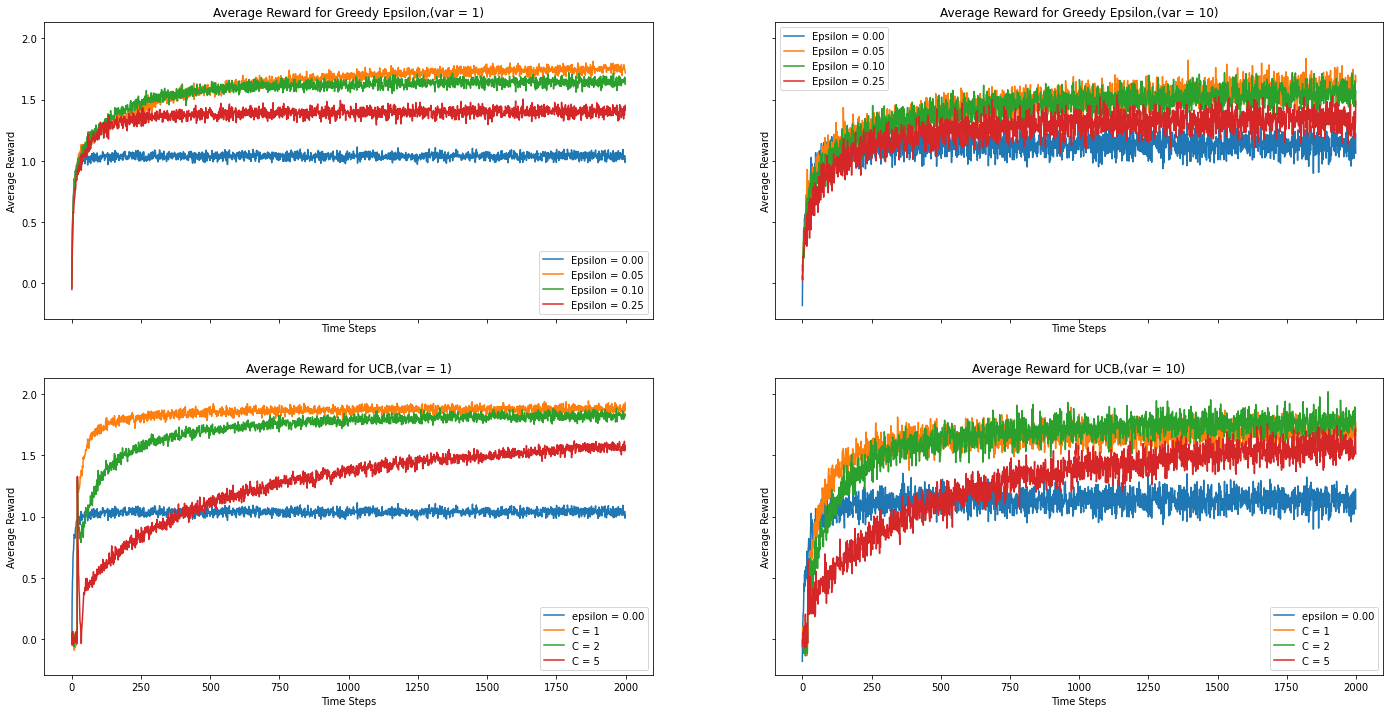

In [150]:
fig, axes = plt.subplots(nrows= 2, ncols = 2, figsize = (24, 12), sharex = True, sharey = True)
axes[0][0].plot(avaerage_rewards_eps1[0], label = 'Epsilon = %0.02f' %(epsilons[0]))
axes[0][0].plot(avaerage_rewards_eps1[1], label = 'Epsilon = %0.02f' %(epsilons[1]))
axes[0][0].plot(avaerage_rewards_eps1[2], label = 'Epsilon = %0.02f' %(epsilons[2]))
axes[0][0].plot(avaerage_rewards_eps1[3], label = 'Epsilon = %0.02f' %(epsilons[3]))
axes[0][0].set_title('Average Reward for Realistic Greedy Epsilon,(var = 1)')
axes[0][0].set_xlabel('Time Steps')
axes[0][0].set_ylabel('Average Reward')
axes[0][0].legend(loc = 'best')



axes[0][1].plot(avaerage_rewards_eps2[0], label = 'Epsilon = %0.02f' %(epsilons[0]))
axes[0][1].plot(avaerage_rewards_eps2[1], label = 'Epsilon = %0.02f' %(epsilons[1]))
axes[0][1].plot(avaerage_rewards_eps2[2], label = 'Epsilon = %0.02f' %(epsilons[2]))
axes[0][1].plot(avaerage_rewards_eps2[3], label = 'Epsilon = %0.02f' %(epsilons[3]))
axes[0][1].set_title('Average Reward for Realistic Greedy Epsilon,(var = 10)')
axes[0][1].set_xlabel('Time Steps')
axes[0][1].set_ylabel('Average Reward')
axes[0][1].legend(loc = 'best')

axes[1][0].plot(avaerage_rewards_eps1[1], label = 'epsilon = %0.02f' %(epsilons[1]))
axes[1][0].plot(avaerage_rewards_ucb1[0], label = 'C = %0.0f' %(C[0]))
axes[1][0].plot(avaerage_rewards_ucb1[1], label = 'C = %0.0f' %(C[1]))
axes[1][0].plot(avaerage_rewards_ucb1[2], label = 'C = %0.0f' %(C[2]))


axes[1][0].set_title('Average Reward for Realistic UCB,(var = 1)')
axes[1][0].set_xlabel('Time Steps')
axes[1][0].set_ylabel('Average Reward')
axes[1][0].legend(loc = 'best')


axes[1][1].plot(avaerage_rewards_eps2[1], label = 'epsilon = %0.02f' %(epsilons[1]))
axes[1][1].plot(avaerage_rewards_ucb2[0], label = 'C = %0.0f' %(C[0]))
axes[1][1].plot(avaerage_rewards_ucb2[1], label = 'C = %0.0f' %(C[1]))
axes[1][1].plot(avaerage_rewards_ucb2[2], label = 'C = %0.0f' %(C[2]))


axes[1][1].set_title('Average Reward for Realistic UCB,(var = 10)')
axes[1][1].set_xlabel('Time Steps')
axes[1][1].set_ylabel('Average Reward')
axes[1][1].legend(loc = 'best')

We can see here that the realistic- $\epsilon$ greedy algorithm gives us maximum average reward over timesteps = 2000
for a optimum value of $\epsilon$ = 0.05
for a greedy algorithm $\epsilon$ = 0 and a large value of $\epsilon$ = 0.1, the algorithm comes to a saturated state early and the reward is less 

for higher variance reward, the boundaries are overlapping and rewards are less as compared to lowere variance 


UCB algorithm perform better than the epsilon-greedy algorithm
and as C increases the av reward decreases. reward function with higher variance performs a bit lesser than lower variance reward function

### % Optimal Action plots for realistic ep-greedy and UCB algorithm (initial estimate = 0)¶

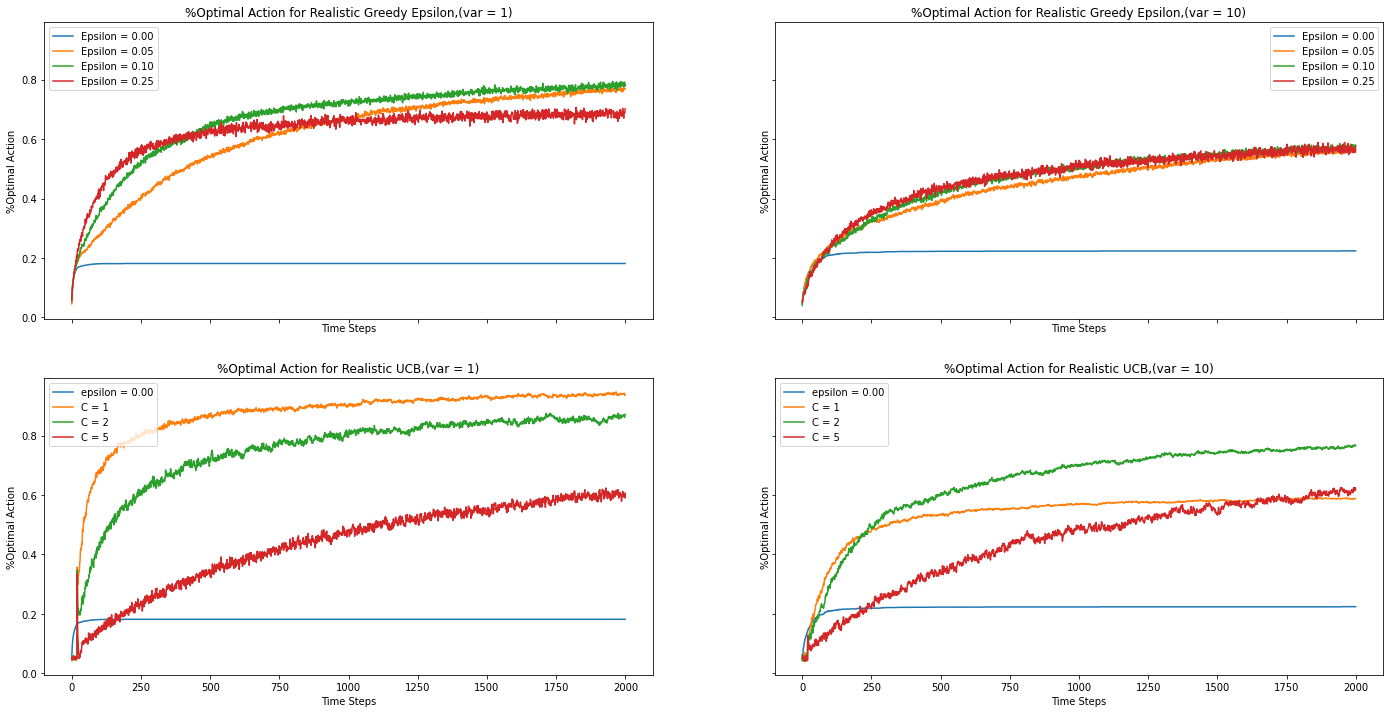

In [151]:
fig, axes = plt.subplots(nrows= 2, ncols = 2, figsize = (24, 12), sharex = True, sharey = True)
axes[0][0].plot(best_actions_eps1[0], label = 'Epsilon = %0.02f' %(epsilons[0]))
axes[0][0].plot(best_actions_eps1[1], label = 'Epsilon = %0.02f' %(epsilons[1]))
axes[0][0].plot(best_actions_eps1[2], label = 'Epsilon = %0.02f' %(epsilons[2]))
axes[0][0].plot(best_actions_eps1[3], label = 'Epsilon = %0.02f' %(epsilons[3]))
axes[0][0].set_title('%Optimal Action for Realistic Greedy Epsilon,(var = 1)')
axes[0][0].set_xlabel('Time Steps')
axes[0][0].set_ylabel('%Optimal Action')
axes[0][0].legend(loc = 'best')



axes[0][1].plot(best_actions_eps2[0], label = 'Epsilon = %0.02f' %(epsilons[0]))
axes[0][1].plot(best_actions_eps2[1], label = 'Epsilon = %0.02f' %(epsilons[1]))
axes[0][1].plot(best_actions_eps2[2], label = 'Epsilon = %0.02f' %(epsilons[2]))
axes[0][1].plot(best_actions_eps2[3], label = 'Epsilon = %0.02f' %(epsilons[3]))
axes[0][1].set_title('%Optimal Action for Realistic Greedy Epsilon,(var = 10)')
axes[0][1].set_xlabel('Time Steps')
axes[0][1].set_ylabel('%Optimal Action')
axes[0][1].legend(loc = 'best')

axes[1][0].plot(best_actions_eps1[0], label = 'epsilon = %0.02f' %(epsilons[0]))
axes[1][0].plot(best_actions_ucb1[0], label = 'C = %0.0f' %(C[0]))
axes[1][0].plot(best_actions_ucb1[1], label = 'C = %0.0f' %(C[1]))
axes[1][0].plot(best_actions_ucb1[2], label = 'C = %0.0f' %(C[2]))


axes[1][0].set_title('%Optimal Action for Realistic UCB,(var = 1)')
axes[1][0].set_xlabel('Time Steps')
axes[1][0].set_ylabel('%Optimal Action')
axes[1][0].legend(loc = 'best')


axes[1][1].plot(best_actions_eps2[0], label = 'epsilon = %0.02f' %(epsilons[0]))
axes[1][1].plot(best_actions_ucb2[0], label = 'C = %0.0f' %(C[0]))
axes[1][1].plot(best_actions_ucb2[1], label = 'C = %0.0f' %(C[1]))
axes[1][1].plot(best_actions_ucb2[2], label = 'C = %0.0f' %(C[2]))


axes[1][1].set_title('%Optimal Action for Realistic UCB,(var = 10)')
axes[1][1].set_xlabel('Time Steps')
axes[1][1].set_ylabel('%Optimal Action')
axes[1][1].legend(loc = 'best')

## 3. Optimistic $\epsilon$- greedy algorithms

parameters for the bandit will be:
- no of arms = 20
- epsilon = [0.0, 0.05, 0.1, 0.25] 
- reward variance = [1, 10]
- iterations(time-steps) = 2000
- episods = 2000 (2000 randomly generated bandits)
- **initial_q = 5**

In [146]:
epsilons = [0.0, 0.05, 0.1, 0.25]
avaerage_rewards_eps3, best_actions_eps3 = list(), list()
for epsilon in epsilons:
    bandit = ma_bandit(k=20, epsilon=epsilon, iters = 2000, initial_q= 5, episods = 2000, variance = 1, C= None)
    mean_best_action_counts, mean_rewards = bandit.run()
    avaerage_rewards_eps3.append(mean_rewards)
    best_actions_eps3.append(mean_best_action_counts)

In [147]:
avaerage_rewards_eps4, best_actions_eps4 = list(), list()
for epsilon in epsilons:
    bandit = ma_bandit(k=20, epsilon=epsilon, iters = 2000, initial_q= 5, episods = 2000, variance = 10, C= None)
    mean_best_action_counts, mean_rewards = bandit.run()
    avaerage_rewards_eps4.append(mean_rewards)
    best_actions_eps4.append(mean_best_action_counts)

## 4. Optimistic UCB algorithms :

parameters for the bandit will be:
- no of arms = 20
- C = [1.0, 2.0, 5.0] 
- reward variance = [1, 10]
- iterations(time-steps) = 2000
- episods = 2000 (2000 randomly generated bandits)
- **initial_q = 5**

In [148]:
C = [1.0, 2.0, 5.0]
avaerage_rewards_ucb3, best_actions_ucb3 = list(), list()
for c in C:
    ucb_bandit = ma_bandit(k=20, epsilon=0, iters = 2000, initial_q= 5, episods = 2000, variance = 1, C= c)
    best_action_count, average_reward = ucb_bandit.run()
    avaerage_rewards_ucb3.append(average_reward)
    best_actions_ucb3.append(best_action_count)


In [149]:
avaerage_rewards_ucb4, best_actions_ucb4 = list(), list()
for c in C:
    ucb_bandit = ma_bandit(k=20, epsilon=0, iters = 2000, initial_q= 5, episods = 2000, variance = 10, C= c)
    best_action_count, average_reward = ucb_bandit.run()
    avaerage_rewards_ucb4.append(average_reward)
    best_actions_ucb4.append(best_action_count)


### Average reward plots for optimistic ep-greedy and UCB algorithm  (initial estimate = 5)

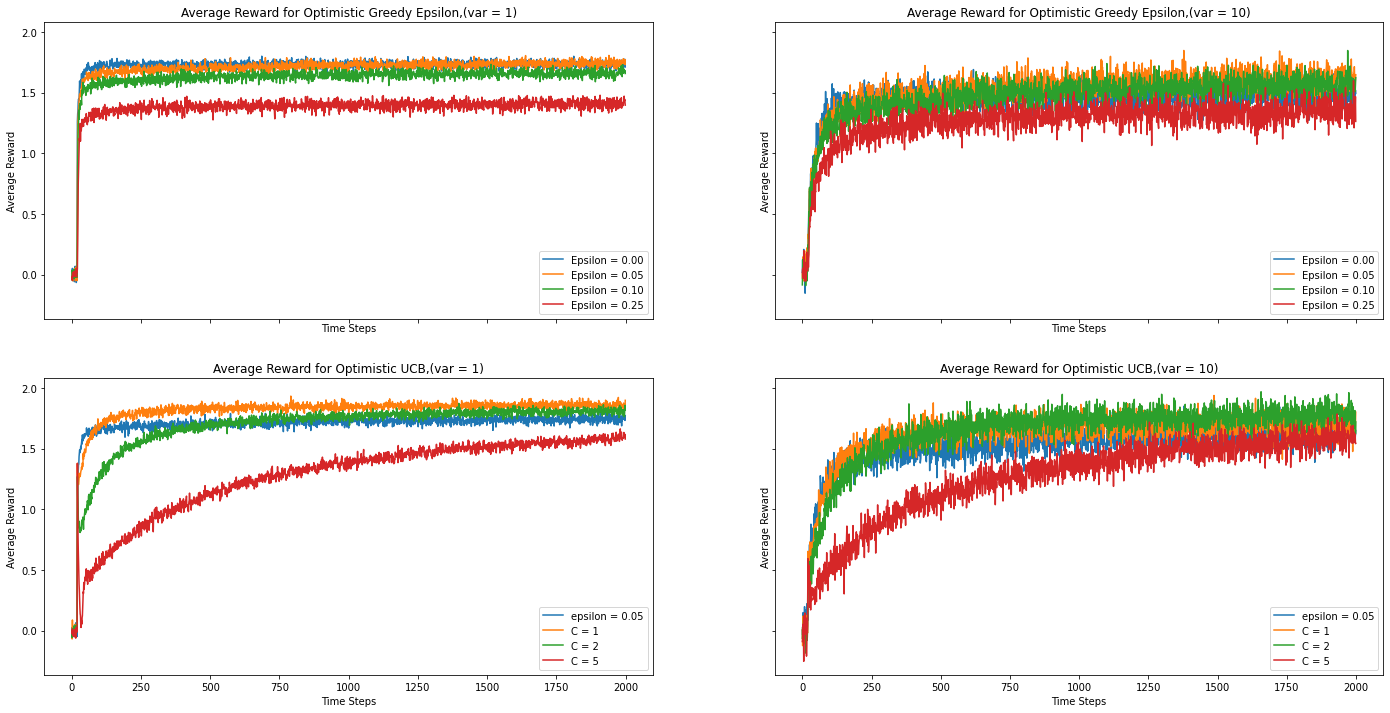

In [152]:
fig, axes = plt.subplots(nrows= 2, ncols = 2, figsize = (24, 12), sharex = True, sharey = True)
axes[0][0].plot(avaerage_rewards_eps3[0], label = 'Epsilon = %0.02f' %(epsilons[0]))
axes[0][0].plot(avaerage_rewards_eps3[1], label = 'Epsilon = %0.02f' %(epsilons[1]))
axes[0][0].plot(avaerage_rewards_eps3[2], label = 'Epsilon = %0.02f' %(epsilons[2]))
axes[0][0].plot(avaerage_rewards_eps3[3], label = 'Epsilon = %0.02f' %(epsilons[3]))
axes[0][0].set_title('Average Reward for Optimistic Greedy Epsilon,(var = 1)')
axes[0][0].set_xlabel('Time Steps')
axes[0][0].set_ylabel('Average Reward')
axes[0][0].legend(loc = 'best')



axes[0][1].plot(avaerage_rewards_eps4[0], label = 'Epsilon = %0.02f' %(epsilons[0]))
axes[0][1].plot(avaerage_rewards_eps4[1], label = 'Epsilon = %0.02f' %(epsilons[1]))
axes[0][1].plot(avaerage_rewards_eps4[2], label = 'Epsilon = %0.02f' %(epsilons[2]))
axes[0][1].plot(avaerage_rewards_eps4[3], label = 'Epsilon = %0.02f' %(epsilons[3]))
axes[0][1].set_title('Average Reward for Optimistic Greedy Epsilon,(var = 10)')
axes[0][1].set_xlabel('Time Steps')
axes[0][1].set_ylabel('Average Reward')
axes[0][1].legend(loc = 'best')

axes[1][0].plot(avaerage_rewards_eps3[1], label = 'epsilon = %0.02f' %(epsilons[1]))
axes[1][0].plot(avaerage_rewards_ucb3[0], label = 'C = %0.0f' %(C[0]))
axes[1][0].plot(avaerage_rewards_ucb3[1], label = 'C = %0.0f' %(C[1]))
axes[1][0].plot(avaerage_rewards_ucb3[2], label = 'C = %0.0f' %(C[2]))


axes[1][0].set_title('Average Reward for Optimistic UCB,(var = 1)')
axes[1][0].set_xlabel('Time Steps')
axes[1][0].set_ylabel('Average Reward')
axes[1][0].legend(loc = 'best')


axes[1][1].plot(avaerage_rewards_eps4[1], label = 'epsilon = %0.02f' %(epsilons[1]))
axes[1][1].plot(avaerage_rewards_ucb4[0], label = 'C = %0.0f' %(C[0]))
axes[1][1].plot(avaerage_rewards_ucb4[1], label = 'C = %0.0f' %(C[1]))
axes[1][1].plot(avaerage_rewards_ucb4[2], label = 'C = %0.0f' %(C[2]))


axes[1][1].set_title('Average Reward for Optimistic UCB,(var = 10)')
axes[1][1].set_xlabel('Time Steps')
axes[1][1].set_ylabel('Average Reward')
axes[1][1].legend(loc = 'best')

### % Optimal Action plots for optimistic ep-greedy and UCB algorithm (initial estimate = 5)¶

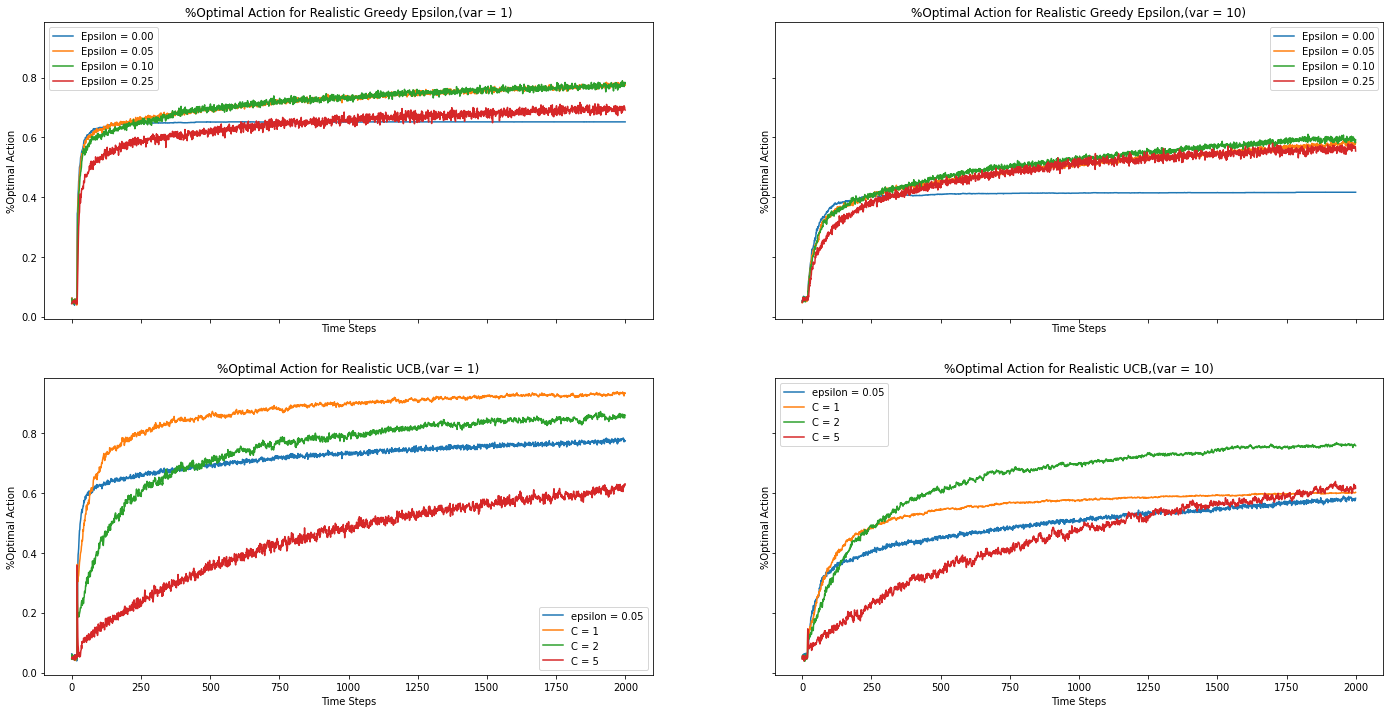

In [153]:
fig, axes = plt.subplots(nrows= 2, ncols = 2, figsize = (24, 12), sharex = True, sharey = True)
axes[0][0].plot(best_actions_eps3[0], label = 'Epsilon = %0.02f' %(epsilons[0]))
axes[0][0].plot(best_actions_eps3[1], label = 'Epsilon = %0.02f' %(epsilons[1]))
axes[0][0].plot(best_actions_eps3[2], label = 'Epsilon = %0.02f' %(epsilons[2]))
axes[0][0].plot(best_actions_eps3[3], label = 'Epsilon = %0.02f' %(epsilons[3]))
axes[0][0].set_title('%Optimal Action for Realistic Greedy Epsilon,(var = 1)')
axes[0][0].set_xlabel('Time Steps')
axes[0][0].set_ylabel('%Optimal Action')
axes[0][0].legend(loc = 'best')



axes[0][1].plot(best_actions_eps4[0], label = 'Epsilon = %0.02f' %(epsilons[0]))
axes[0][1].plot(best_actions_eps4[1], label = 'Epsilon = %0.02f' %(epsilons[1]))
axes[0][1].plot(best_actions_eps4[2], label = 'Epsilon = %0.02f' %(epsilons[2]))
axes[0][1].plot(best_actions_eps4[3], label = 'Epsilon = %0.02f' %(epsilons[3]))
axes[0][1].set_title('%Optimal Action for Realistic Greedy Epsilon,(var = 10)')
axes[0][1].set_xlabel('Time Steps')
axes[0][1].set_ylabel('%Optimal Action')
axes[0][1].legend(loc = 'best')

axes[1][0].plot(best_actions_eps3[1], label = 'epsilon = %0.02f' %(epsilons[1]))
axes[1][0].plot(best_actions_ucb3[0], label = 'C = %0.0f' %(C[0]))
axes[1][0].plot(best_actions_ucb3[1], label = 'C = %0.0f' %(C[1]))
axes[1][0].plot(best_actions_ucb3[2], label = 'C = %0.0f' %(C[2]))


axes[1][0].set_title('%Optimal Action for Realistic UCB,(var = 1)')
axes[1][0].set_xlabel('Time Steps')
axes[1][0].set_ylabel('%Optimal Action')
axes[1][0].legend(loc = 'best')


axes[1][1].plot(best_actions_eps4[1], label = 'epsilon = %0.02f' %(epsilons[1]))
axes[1][1].plot(best_actions_ucb4[0], label = 'C = %0.0f' %(C[0]))
axes[1][1].plot(best_actions_ucb4[1], label = 'C = %0.0f' %(C[1]))
axes[1][1].plot(best_actions_ucb4[2], label = 'C = %0.0f' %(C[2]))


axes[1][1].set_title('%Optimal Action for Realistic UCB,(var = 10)')
axes[1][1].set_xlabel('Time Steps')
axes[1][1].set_ylabel('%Optimal Action')
axes[1][1].legend(loc = 'best')

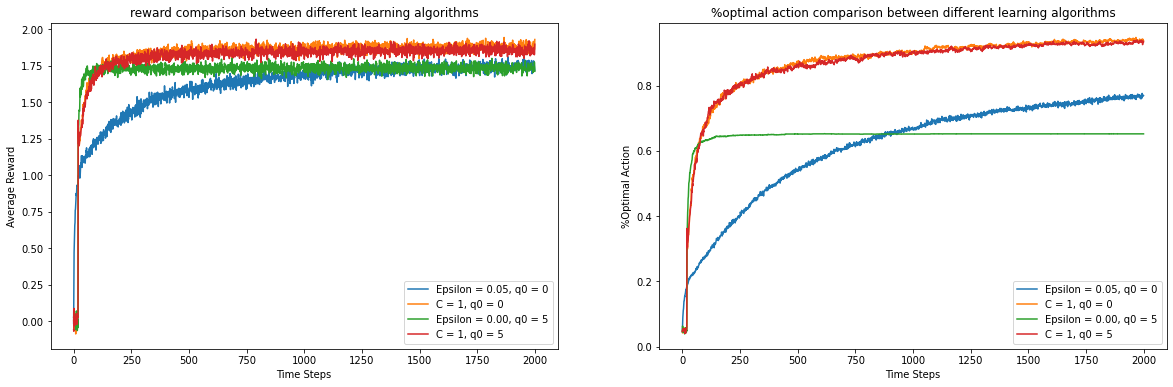

In [156]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 6))

axes[0].plot(avaerage_rewards_eps1[1], label = 'Epsilon = %0.02f, q0 = 0' %(epsilons[1]))
axes[0].plot(avaerage_rewards_ucb1[0], label = 'C = %0.0f, q0 = 0' %(C[0]))
axes[0].plot(avaerage_rewards_eps3[0], label = 'Epsilon = %0.02f, q0 = 5' %(epsilons[0]))
axes[0].plot(avaerage_rewards_ucb3[0], label = 'C = %0.0f, q0 = 5' %(C[0]))

axes[0].set_title('reward comparison between different learning algorithms')
axes[0].set_xlabel('Time Steps')
axes[0].set_ylabel('Average Reward')
axes[0].legend(loc = 'best')


axes[1].plot(best_actions_eps1[1], label = 'Epsilon = %0.02f, q0 = 0' %(epsilons[1]))
axes[1].plot(best_actions_ucb1[0], label = 'C = %0.0f, q0 = 0' %(C[0]))
axes[1].plot(best_actions_eps3[0], label = 'Epsilon = %0.02f, q0 = 5' %(epsilons[0]))
axes[1].plot(best_actions_ucb3[0], label = 'C = %0.0f, q0 = 5' %(C[0]))

axes[1].set_title('%optimal action comparison between different learning algorithms')
axes[1].set_xlabel('Time Steps')
axes[1].set_ylabel('%Optimal Action')
axes[1].legend(loc = 'best')

## Conclusion


We can see that setting the initial estimate does not have a large impact on UCB algorithm as opposed to $\epsilon$ greedy algorithms 